# Exploratory Data Analysis

### Import libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [67]:
df=pd.read_csv(r"stock_data.csv")

### Data Exploration

In [68]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791183,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579245,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117439,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022627,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065746,458707200


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [70]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,62.383387,63.087693,61.696664,62.416599,60.379425,1.713540e+08
std,48.683035,49.322128,48.051043,48.709794,49.039435,1.250497e+08
min,13.856071,14.271429,13.753571,13.947500,12.013334,3.519590e+07
25%,26.971250,27.219376,26.705000,26.983750,24.571798,9.188698e+07
50%,41.353750,41.872499,40.888750,41.313749,39.343815,1.301368e+08
75%,91.272499,92.881876,90.824377,91.526875,89.740067,2.045116e+08
max,182.630005,182.940002,179.119995,182.009995,180.190979,1.460852e+09


### Data cleaning

In [71]:
df=df.drop(["Date","Adj Close",],axis=1)


In [72]:
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


In [73]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

##### no Null value is present

# Model

In [74]:
# Extract features and target variable
x=df.drop(columns="Close")
y=df["Close"]

In [75]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [77]:
mms=MinMaxScaler()

In [78]:
mms.fit(x[["Open","High","Low","Volume"]])

MinMaxScaler()

In [79]:
column_trans=make_column_transformer((MinMaxScaler(),['Open','High','Low','Volume']),remainder="passthrough")

In [80]:
# Initialize and train the linear regression model
lr=LinearRegression()

In [81]:
pipe=make_pipeline(column_trans,lr)

In [82]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Open', 'High', 'Low',
                                                   'Volume'])])),
                ('linearregression', LinearRegression())])

In [83]:
# Make predictions on the test set
y_pred=pipe.predict(X_test)

In [84]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
r2

0.9998639209228775

In [85]:
pipe.predict(pd.DataFrame([[19.779285,19.821428,19.343929,2.518000e+03]],columns=['Open','High','Low','Volume']))

array([19.48552622])

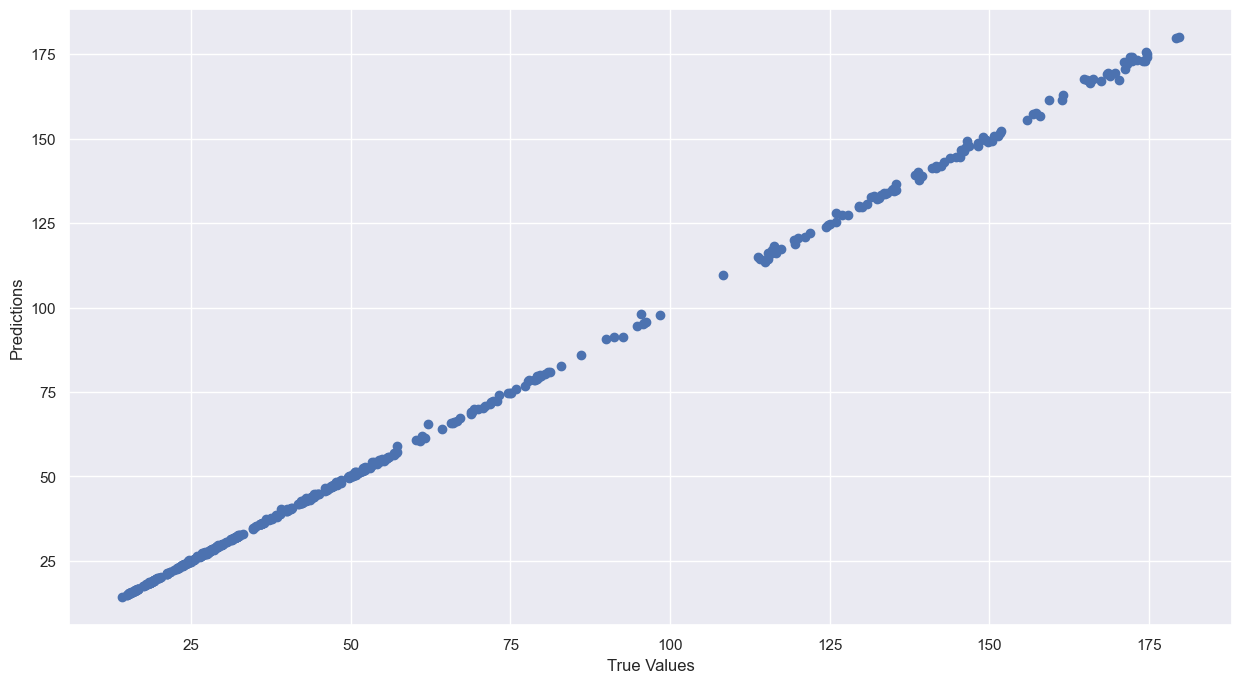

In [86]:
# Visualize predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
